# Project: Investigate a Dataset - [Patients]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.



### Question for Analysis
>What is the independant variables that affect patients' attendance for their scheduled appointment?

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Loading data, assessing it, then cleaning it for analysis.


### General Properties

In [2]:
# Loading data and print out a few lines. Performing operations to inspect data
#   types and look for instances of missing or possibly errant data.


df_patients = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_patients.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
L = '--------------------------------------------------------'
print(sum(df_patients.duplicated()))
print(L)    
print(df_patients.shape)
print(L)
print(df_patients.info())
print(L)
print(df_patients.dtypes)
print(L)
print(df_patients.nunique())
print(L)
df_patients.describe()

0
--------------------------------------------------------
(110527, 14)
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int6

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> Note that: ScheduledDay and AppointmentDay columns types are strings and need to be converted. AppointmentDay is not always after ScheduledDay. No duplicated rows. Data is 14 columns of 110527 rows with no missing data. PatientId column has only 62299 unique values so it has to be cleaned. Minimum Age is -1 which is illogical and should be dropped.

In [4]:
# Converting ScheduledDay and AppointmentDay columns types from string to datetime

df_patients['ScheduledDay'] = pd.to_datetime(df_patients['ScheduledDay'])
df_patients['AppointmentDay'] = pd.to_datetime(df_patients['AppointmentDay'])
df_patients.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [5]:
# Dropping rows when AppointmentDay is not after ScheduledDay

df_patients = df_patients[df_patients.AppointmentDay > df_patients.ScheduledDay]
df_patients['time_gab'] = df_patients['AppointmentDay'] - df_patients['ScheduledDay']
df_patients.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_gab
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,15 days 03:50:06.596145027
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,16 days 11:46:35.560378677
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:16:20
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 15:14:50
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8 days 16:25:29
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21 days 15:01:04.500000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


In [6]:
# Dropping illogical age values

df_patients = df_patients[df_patients.Age >= 0]
df_patients.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_gab
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,15 days 03:50:06.596145027
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,16 days 11:46:35.560378677
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:16:20
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 15:14:50
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8 days 16:25:29
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21 days 15:01:04.500000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


In [7]:
# Only duplicated values of PatientId column with the same showing status will be dropped (explained in limitations part). 

df_patients.drop_duplicates(['PatientId', 'No-show'], inplace=True)
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52262 entries, 5 to 110524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       52262 non-null  float64            
 1   AppointmentID   52262 non-null  int64              
 2   Gender          52262 non-null  object             
 3   ScheduledDay    52262 non-null  datetime64[ns, UTC]
 4   AppointmentDay  52262 non-null  datetime64[ns, UTC]
 5   Age             52262 non-null  int64              
 6   Neighbourhood   52262 non-null  object             
 7   Scholarship     52262 non-null  int64              
 8   Hipertension    52262 non-null  int64              
 9   Diabetes        52262 non-null  int64              
 10  Alcoholism      52262 non-null  int64              
 11  Handcap         52262 non-null  int64              
 12  SMS_received    52262 non-null  int64              
 13  No-show         52262 non-null

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning data, time for exploration. Computing statistics and creating visualizations with the goal of addressing our main question: **What is the independant variables that affect patients' attendance for their scheduled appointment?** 


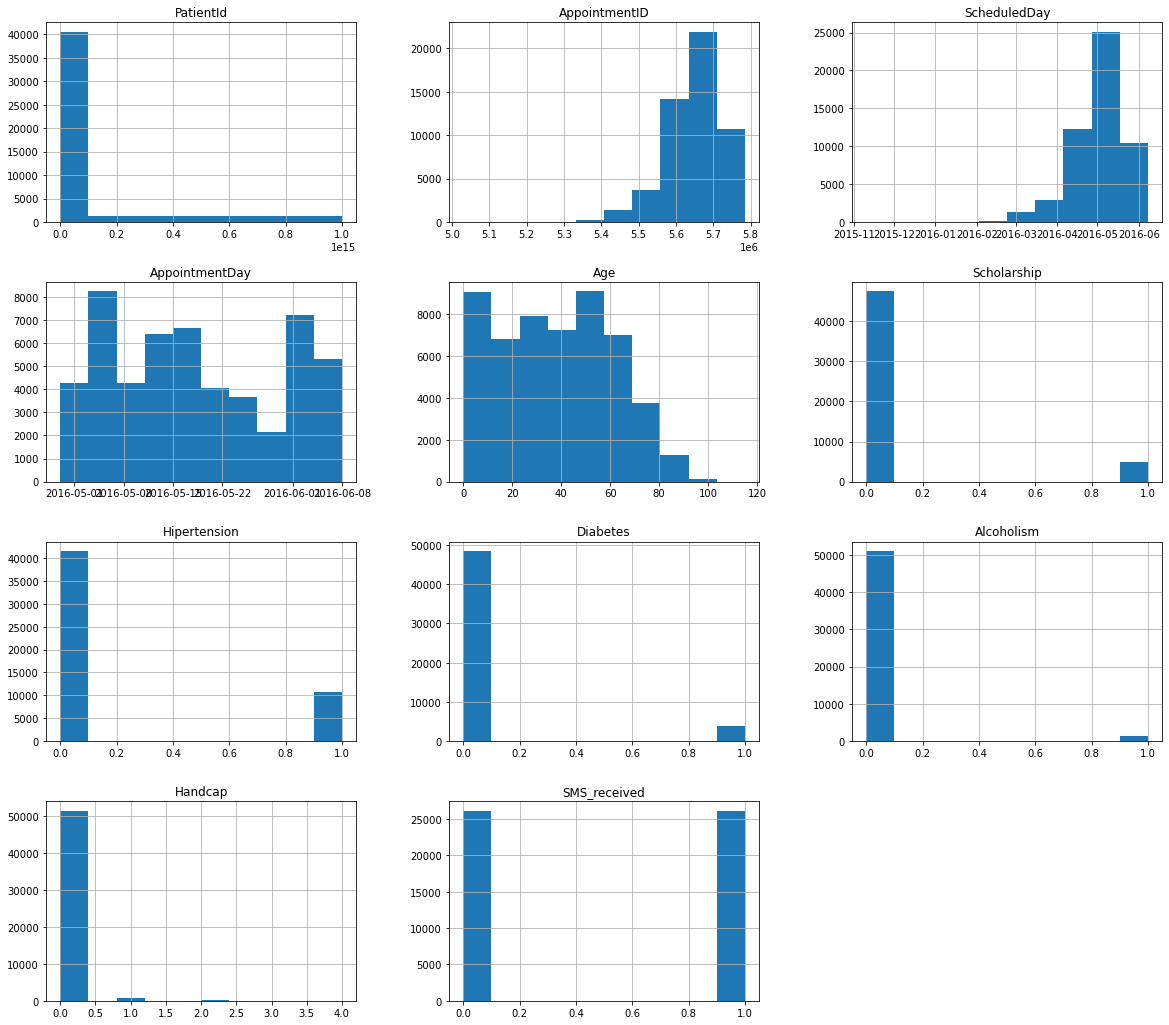

In [8]:
# Exploring Data

df_patients.hist(figsize=(20,18));

No     68.2%
Yes    31.8%
Name: No-show, dtype: object

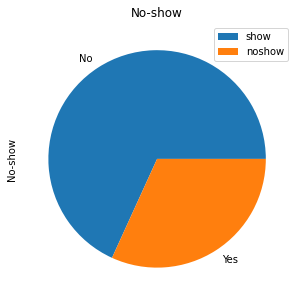

In [21]:
no_show = df_patients['No-show'] == 'Yes'
show = df_patients['No-show'] == 'No'
plt.figure(figsize=[8,5])
df_patients['No-show'].value_counts().plot(kind='pie');
plt.legend(["show", "noshow"], loc ="upper right")
plt.title('No-show')
df_patients['No-show'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Pie chart was chosen to show the percenrage of show and no show patients. 68.2% of patients attend, and 31.8% of them did not.

### Analysis for 3 independant factors (Gab Between ScheduledDay and AppointmentDay - SMS_received - Age)

In [22]:
# Analysis for Gab Between ScheduledDay and AppointmentDay

df_patients_show = df_patients[df_patients['No-show'] == 'No']
df_patients_noshow = df_patients[df_patients['No-show'] == 'Yes']

In [23]:
df_patients_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_gab
count,3.563900e+04,3.563900e+04,35639.000000,35639.000000,35639.000000,35639.000000,35639.000000,35639.000000,35639.000000,35639
mean,1.460075e+14,5.649742e+06,39.415977,0.084262,0.221920,0.076994,0.022363,0.020399,0.506159,15 days 10:40:46.437554364
std,2.540993e+14,7.609476e+04,23.533636,0.277784,0.415543,0.266586,0.147864,0.156079,0.499969,17 days 04:10:33.383120054
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:36:54
25%,3.994706e+12,5.612914e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 13:26:08.500000
50%,3.127748e+13,5.656061e+06,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8 days 16:06:50
75%,9.417313e+13,5.702308e+06,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22 days 13:04:10
max,9.999320e+14,5.784979e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:17:18


In [24]:
df_patients_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_gab
count,1.662300e+04,1.662300e+04,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623
mean,1.456249e+14,5.644195e+06,34.580160,0.108284,0.171930,0.065572,0.029297,0.016904,0.485111,16 days 23:01:43.547313962
std,2.535081e+14,7.498809e+04,22.178248,0.310748,0.377331,0.247540,0.168642,0.145160,0.499793,16 days 21:27:03.311558333
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:19:13
25%,4.155977e+12,5.604676e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 13:22:43
50%,3.177588e+13,5.649488e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12 days 14:43:12
75%,9.438089e+13,5.694844e+06,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25 days 09:24:17
max,9.996585e+14,5.784663e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


The mean time gab between scheduled day and appointment day of the attendants (15 days) is very close in case of the patients who do not attend (16 days). Please read conclusions part.

In [25]:
def analize(factor):
    plt.figure(figsize=[20,10])
    df_patients[factor][show].hist(alpha=.5, bins=15, color='green', label='show');
    df_patients[factor][no_show].hist(alpha=.5, bins=15, color='red', label='no_show');
    plt.legend();
    plt.title(factor)
    plt.xlabel(factor)
    plt.ylabel('no. of patients');    

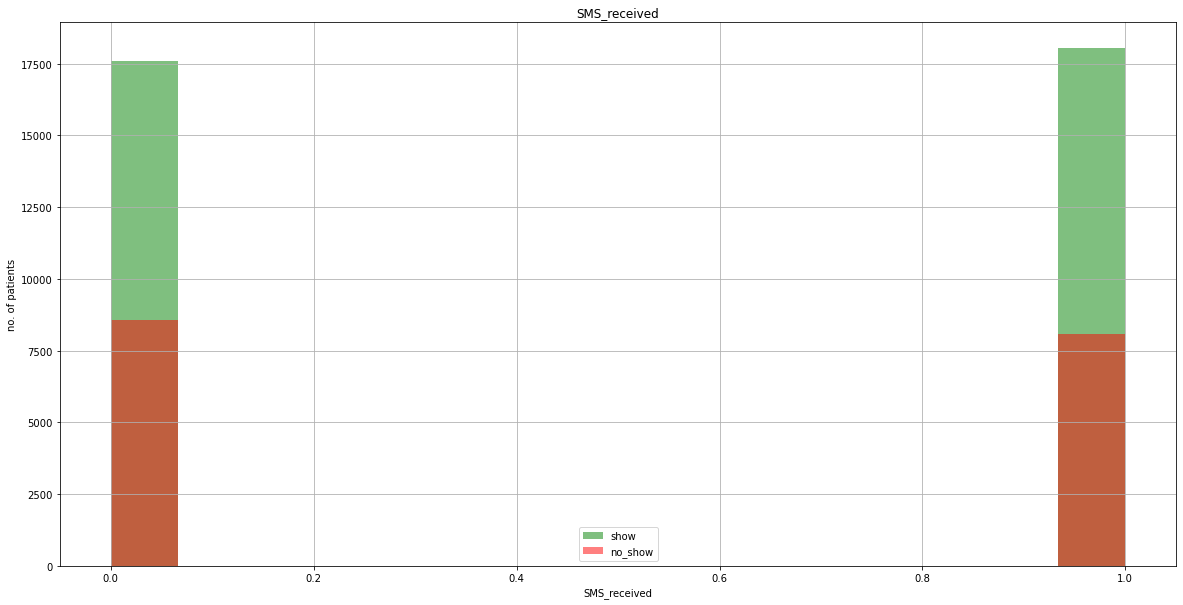

In [26]:
# Analysis for SMS_received column

analize('SMS_received')

>The number of attendants withoud receiving a SMS is very close to the number of attendants who received!

>Read conclusions part for recommendatios.

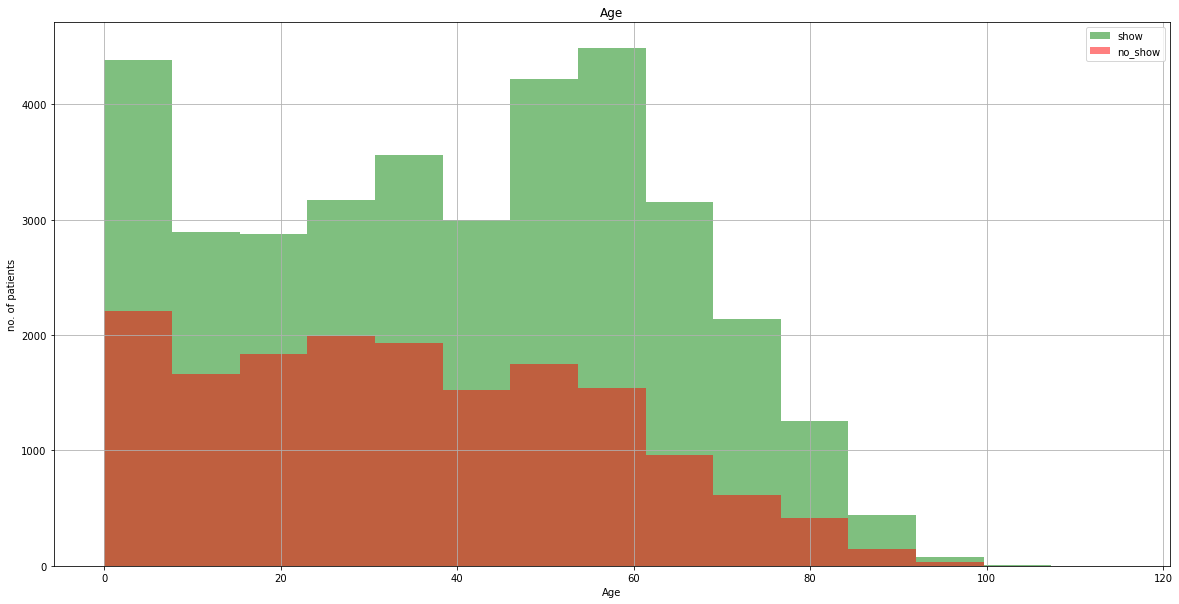

In [27]:
# Analysis for Age column

analize('Age')

Histogram has been chosen to show the disribution of age variable. It shows that the rate of attendance is decreasing after the age of 62 years. Read conclusions part for recommendatios.

<a id='conclusions'></a>
## Conclusions

> In the relation of our main question three independant factors have been analized to predict the reasons why 31.8 % of patients do not attend which results are:

> 1- The number of attendants withoud receiving a SMS is very close to the number of attendants who received!

> 2- The rate of attendance is decreasing after the age of 62 years.

> 3- The time gab between scheduled day and appointment day is not affecting patients' attendance as the mean time gab of the attendants (15 days) is very close in case of the patients who do not attend (16 days).


#### Recommendations

> A very good caring of SMS contents, timing, and patients phone numbers update is required.

> Planning for markting compaigns that targets old age people.


#### Limitation

> PatientId column has only 62299 unique values which could mislead the analysis process. But if they all were dropped, it is another misleading as one patient may have a different showing status for a different appointment! 

> So, only duplicated values of PatientId column with the same showing status had been dropped.

In [114]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1